## Data analysis
- Step 0: Training-validation data split
- **Step 1: Data analysis**
	- Handle missing values (NaNs)
	- Clip outliers
	- Analyze distribution of the features
- Step 2: Classification
- Step 3: Model Validation

In [14]:
%matplotlib inline
# %matplotlib qt

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import modules.data_framework.utildata as utdata
import modules.utilgen as utgen
# from modules.utilgen import viewdf
sns.set_style("whitegrid")

%reload_ext autoreload
%autoreload 2

###Load and check data
- Currently, only training data set is used for data analysis
- It is possible to include features from Validation I data set (judgement call).

In [2]:
#-- Data load and preview
sns.set_style("whitegrid")
dataTrainPath = 'data\\data_derived\\train1.csv'
dataTrain = pd.read_csv(dataTrainPath, index_col=0)
display(dataTrain.sample(n=5))
display(dataTrain.describe())
display(dataTrain.info())
dataC = dataTrain.copy()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.0500,NaN,S
725,1,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.1000,E8,S
341,1,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.0000,F2,S
223,0,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.0500,NaN,S
726,0,3,"Oreskovic, Mr. Luka",male,20.0,0,0,315094,8.6625,NaN,S


,Survived,Pclass,Age,SibSp,Parch,Fare
count,623.000000,623.000000,505.000000,623.000000,623.000000,623.000000
mean,0.404494,2.309791,29.265842,0.526485,0.373997,31.792923
std,0.491188,0.832625,14.070644,1.057292,0.785580,46.398386
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.695800
max,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 752 to 848
Data columns (total 11 columns):
Survived    623 non-null int64
Pclass      623 non-null int64
Name        623 non-null object
Sex         623 non-null object
Age         505 non-null float64
SibSp       623 non-null int64
Parch       623 non-null int64
Ticket      623 non-null object
Fare        623 non-null float64
Cabin       141 non-null object
Embarked    621 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 58.4+ KB


None

In [3]:
#-- view the training set in a browser
# viewdf(dataTrain.sample(n=40))

### Feature description
- The features include continuous, binary, categorical and string variables.

In [4]:
display(pd.read_csv(os.path.join('data','description','features_description.csv'), encoding='iso-8859-1'))

,Variable,Definition,Value
0,Survived,Survived the disaster,"0 = No, 1 = Yes"
1,Name,Name,"Surname, Title Name"
2,Sex,Sex,"male, female"
3,Age,Age in years,> 0
4,SibSp,Siblings + spouses aboard,"0, 1, 2, ..."
5,Parch,Parents + children aboard,"0, 1, 2, ..."
6,Ticket,Ticket number,Letters and digits
7,Fare,Ticket price,> 0
8,Pclass,Ticket class,"1 = Upper, 2 = Middle, 3 = Lower"
9,Cabin,Cabin number,Desk letter (A - F) + digits


###Missing values and dummy variables

In [5]:
#-- NaN summary
display(dataC.isna().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         118
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       482
Embarked      2
dtype: int64

#### Embarked and Sex
- Only 2 Embarked values are missing => it is safe to impute them using median.
- It is convinient to encode Sex as 0 for male and 1 for female.

In [6]:
utdata.imputeFeature(dataC, 'Embarked', 'mode')
dataC = utdata.dummyFeature(dataC, 'Embarked', prefix_sep='') 
utdata.dropFeature(dataC, 'EmbarkedQ')
dataC = utdata.dummyFeature(dataC, 'Sex') 
utdata.dropFeature(dataC, 'Sex_male')
dataC.rename(columns = {'Sex_female':'Female'}, inplace = True)
display(dataC.sample(n=5))

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,EmbarkedC,EmbarkedS,Female
PassengerId,,,,,,,,,,,,
451,0,2,"West, Mr. Edwy Arthur",36.0,1,2,C.A. 34651,27.7500,NaN,0,1,0
332,0,1,"Partner, Mr. Austen",45.5,0,0,113043,28.5000,C124,0,1,0
286,0,3,"Stankovic, Mr. Ivan",33.0,0,0,349239,8.6625,NaN,1,0,0
334,0,3,"Vander Planke, Mr. Leo Edmondus",16.0,2,0,345764,18.0000,NaN,0,1,0
111,0,1,"Porter, Mr. Walter Chamberlain",47.0,0,0,110465,52.0000,C110,0,1,0


#### Ticket and Cabin
- Ticket is difficult to use => drop it for now.
- Cabin has many missing values. NaN values may be useful => encode Cabin as 0 for NaN and 1 for a valid value.
- The first letter of Cabin corresponds to the desk, which could be used (to do later).

In [7]:
utdata.dropFeature(dataC, 'Ticket')
dataC['CabinNan'] = dataC['Cabin'].isna().astype(int)
utdata.dropFeature(dataC, 'Cabin')

#### Name
- The title in the name could be useful => Extract it as a new categorical feature Title.
- The surname could be used to find relatives aboard (to do later).
- The name and surname could be used to deduce ethnicity (to do later).

In [8]:
#-- Extracting the title (later: could use the surname)
titles = dataC.Name.apply(utdata.getTitle)
display(titles.value_counts())
titles[(titles == 'Mlle')] = 'Miss'
titles[(titles == 'Mme')] = 'Mrs'
titles[(titles != 'Mr') & (titles != 'Miss') & (titles != 'Mrs') & (titles != 'Master')] = 'Rare'
display(titles.value_counts())
display(dataC.loc[((titles != 'Miss') & (titles != 'Mrs')) & (dataC.Female == 1), :])

Mr              345
Miss            132
Mrs              97
Master           29
Dr                6
Rev               4
Mlle              2
Col               2
Major             1
the Countess      1
Jonkheer          1
Mme               1
Don               1
Ms                1
Name: Name, dtype: int64

Mr        345
Miss      134
Mrs        98
Master     29
           17
Name: Name, dtype: int64

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,EmbarkedC,EmbarkedS,Female,CabinNan
PassengerId,,,,,,,,,,,
760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",33.0,0,0,86.5,0,1,1,0
444,1,2,"Reynaldo, Ms. Encarnacion",28.0,0,0,13.0,0,1,1,1


In [26]:
#-- Dummy titles and drop Name; drop TitleMr and TitleMrs to avoid co-linearity with Female
dataC['Title'] = titles
dataC = utdata.dummyFeature(dataC, 'Title', prefix_sep='')
utdata.dropFeature(dataC, 'TitleMrs')
utdata.dropFeature(dataC, 'TitleMr')
utdata.dropFeature(dataC, 'Name')
with utgen.printOptions():
    display(dataC.sample(n=5))

Name  is not in the DF


,Survived,Pclass,Age,SibSp,Parch,Fare,EmbarkedC,EmbarkedS,Female,CabinNan,TitleMaster,TitleMiss,AgeNan,Title,TitleMaster,TitleMiss
PassengerId,,,,,,,,,,,,,,,,
366,0,3,30.00,0,0,7.25,0,1,0,1,0,0,0,0,0,0
110,1,3,20.24,1,0,24.15,0,0,1,1,0,1,1,0,0,1
152,1,1,22.00,1,0,66.60,0,1,1,0,0,0,0,0,0,0
818,0,2,31.00,1,1,37.00,1,0,0,1,0,0,0,0,0,0
635,0,3,9.00,3,2,27.90,0,1,1,1,0,1,0,0,0,1


#### Age
- Age has approx. 15% NaNs, which can impact classifiers.
- There are several ways to impute the data: e.g., mean, median, or regression.
- We'd like to perserve the feature distribution and not to introduce bias: both linear regression and random forests seems to do a fair job.

In [10]:
#-- Age distribution
with utgen.printOptions():
    display(dataC.describe())
    display(dataC[dataC.Age.isna()].describe())

,Survived,Pclass,Age,SibSp,Parch,Fare,EmbarkedC,EmbarkedS,Female,CabinNan,TitleMaster,TitleMiss,TitleMr,TitleMrs
count,623.00,623.00,505.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00
mean,0.40,2.31,29.27,0.53,0.37,31.79,0.20,0.72,0.38,0.77,0.05,0.22,0.55,0.16
std,0.49,0.83,14.07,1.06,0.79,46.40,0.40,0.45,0.48,0.42,0.21,0.41,0.50,0.36
min,0.00,1.00,0.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,2.00,20.00,0.00,0.00,7.90,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
50%,0.00,3.00,28.00,0.00,0.00,14.45,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00
75%,1.00,3.00,38.00,1.00,0.00,30.70,0.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00
max,1.00,3.00,80.00,8.00,5.00,512.33,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


,Survived,Pclass,Age,SibSp,Parch,Fare,EmbarkedC,EmbarkedS,Female,CabinNan,TitleMaster,TitleMiss,TitleMr,TitleMrs
count,118.00,118.00,0.00,118.00,118.00,118.00,118.00,118.00,118.00,118.00,118.00,118.00,118.00,118.00
mean,0.34,2.62,nan,0.57,0.19,23.12,0.22,0.53,0.35,0.88,0.02,0.24,0.63,0.11
std,0.48,0.75,nan,1.55,0.54,34.22,0.42,0.50,0.48,0.32,0.13,0.43,0.49,0.31
min,0.00,1.00,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,3.00,nan,0.00,0.00,7.75,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
50%,0.00,3.00,nan,0.00,0.00,8.05,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00
75%,1.00,3.00,nan,0.00,0.00,25.14,0.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00
max,1.00,3.00,nan,8.00,2.00,227.53,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


D:\SoftwareWork\PythonProjects\Miniconda\envs\datascience1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\SoftwareWork\PythonProjects\Miniconda\envs\datascience1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Imputed: Random forest')

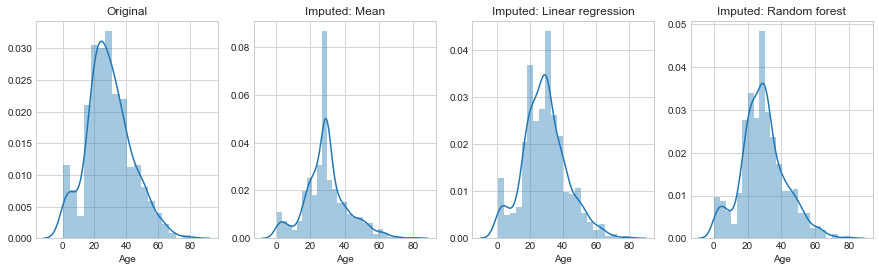

In [15]:
#-- Imputed age distribution
fig, ax = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(dataC.Age[dataC.Age.notna()], ax=ax[0])
dataC_ = dataC.copy(); utdata.imputeFeature(dataC_, 'Age', 'mean')
sns.distplot(dataC_.Age, ax=ax[1])
dataC_ = dataC.copy(); utdata.imputeFeature(dataC_, 'Age', 'linear', methodExclude=['Survived', 'EmbarkedS', 'EmbarkedC'])
# dataC_.loc[dataC_.Age<0,'Age'] = 0
sns.distplot(dataC_.Age, ax=ax[2])
dataC_ = dataC.copy(); utdata.imputeFeature(dataC_, 'Age', 'tree', methodExclude=['Survived', 'EmbarkedS', 'EmbarkedC'])
sns.distplot(dataC_.Age, ax=ax[3])
ax[0].set_title('Original')
ax[1].set_title('Imputed: Mean')
ax[2].set_title('Imputed: Linear regression')
ax[3].set_title('Imputed: Random forest')  

In [16]:
#-- Impute Age column (linear regression)
dataC['AgeNan'] = dataC.Age.isna().astype(int)
utdata.imputeFeature(dataC, 'Age', 'linear')
display(dataC.isna().sum())

Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
EmbarkedC      0
EmbarkedS      0
Female         0
CabinNan       0
TitleMaster    0
TitleMiss      0
TitleMr        0
TitleMrs       0
AgeNan         0
dtype: int64

###Distribution characteristics
- Detecting areas of data condensation and potential outliers.
- Age and Fare have a heavy positive tail. The large positive points can be clipped: even if they are not outliers, they may strongly affect linear or overfit non-linear classfiers.
- The same for SibSp and Parch. We'll handle the outliers later.
- Survival rate is approx. 40% => outcome classes are relatively well balanced.

#### Box plots

In [17]:
# fig, ax = plt.subplots(2, 1)
# (ut.normFeatures(dataC, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])).boxplot(ax=ax[0])
# (ut.normFeatures(dataC, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], 'maxmin')).boxplot(ax=ax[1])
# plt.tight_layout()


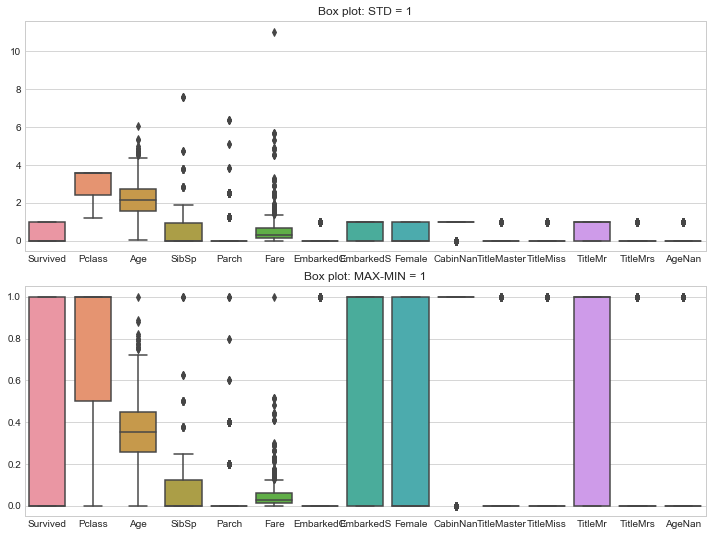

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(10,8))
sns.boxplot(data=utdata.normFeatures(dataC, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], 'std'), ax=ax[0])
sns.boxplot(data=utdata.normFeatures(dataC, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], 'maxmin'), ax=ax[1])
ax[0].set_title('Box plot: STD = 1')
ax[1].set_title('Box plot: MAX-MIN = 1')
fig.tight_layout()
fig.subplots_adjust(top=0.9)


#### Distribution Histogram

In [20]:
## --- Method 1
# dataC.hist()
# plt.tight_layout()

In [21]:
## --- Method 2
# ut.histColumns(dataC)

D:\SoftwareWork\PythonProjects\Miniconda\envs\datascience1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


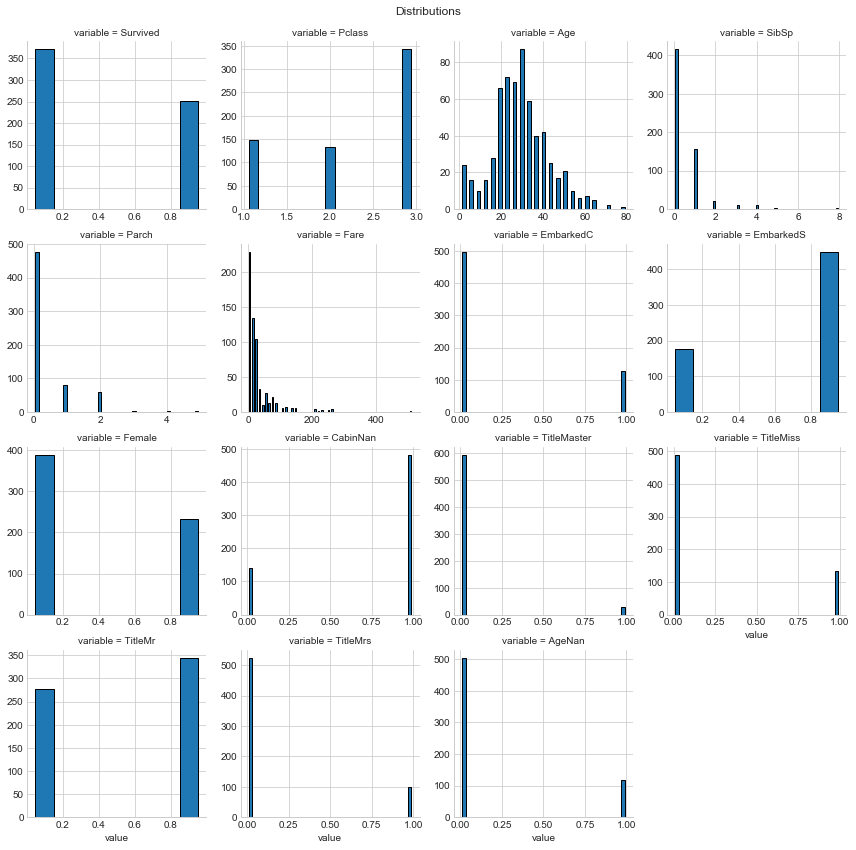

In [23]:
## --- Method 3
g = sns.FacetGrid(dataC.melt(), col='variable', palette='Set1', sharey=False, sharex=False, 
                  col_wrap=4)
g = (g.map(sns.distplot, 'value', kde=False, hist_kws={"rwidth": 0.5, 'edgecolor': 'black', 'alpha': 1.0}))
g.fig.suptitle('Distributions')
g.fig.subplots_adjust(top=0.94)

###Feature-feature and class-feature relationships

#### Correlations
- Highly correlated features may introduce instabilities during fitting, and might be dropped. In our case, correlations are moderate.
- $\rho (\mathrm{TitleMr}, \mathrm{Female})=-0.9$, which is expected: positive TitleMr is almost equivalent to male.
- $\rho (\mathrm{Pclass}, \mathrm{Fare})=-0.8$, which is expected: a higher ticket class is more expensive.
- $\rho (\mathrm{Cabin}, \mathrm{Pclass})=-0.7$: it seems a higher class ticket increases the chance that information about the cabin is saved.
- $\rho (\mathrm{Parch}, \mathrm{SibSp})=0.4$: it seems that the presence of different types of the relatives aboard is correlated.
- $\rho (\mathrm{Age}, \mathrm{TitleMiss})=-0.3$ and $\rho (\mathrm{Age}, \mathrm{TitleMrs})=0.2$: as expected, older women have higher chances to be married.
- $\rho (\mathrm{Age}, \mathrm{TitleMaster})=-0.4$: it seems that majority of 'Masters' are young.
- $\rho (\mathrm{Survived}, \mathrm{Female})=0.6$: it seems that Female could be a single most important predictor.

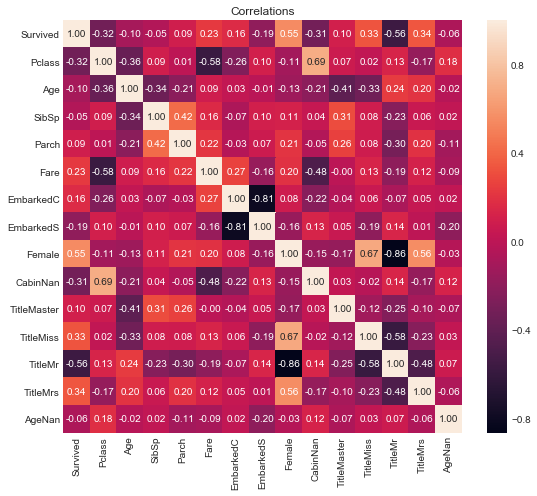

In [25]:
fig, ax = plt.subplots(figsize=(8,7))
g = sns.heatmap(dataC.corr(), annot=True, fmt=".2f", ax=ax)
ax.set_title('Correlations')
fig.tight_layout()

#### Distribution Histogram (Filtered by Survived)
- Features with different distributions for survived and killed passanges are potentially good predictors.
- Many 1st class passengers, and passengers with expensive tickets survived.
- Suprisingly, Cabin seems to be a good predictor - possible, because of correlation with the 1st class tickets.
- It seems passengers with moderately big families aboard have higher chances of survival.
- Port of embarkment looks like a good predictor, although it could be spurious: there is no obvious reason why it would be.


In [42]:
## --- Method 1
# for x in dataC.drop(columns='EmbarkedQ').groupby('Survived'):
#     x[1].hist()
#     plt.tight_layout()

In [43]:
## --- Method 2
# for x in dataC.drop(columns='EmbarkedC').groupby('Survived'):
#     ut.histColumns(x[1])


D:\SoftwareWork\PythonProjects\Miniconda\envs\datascience1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


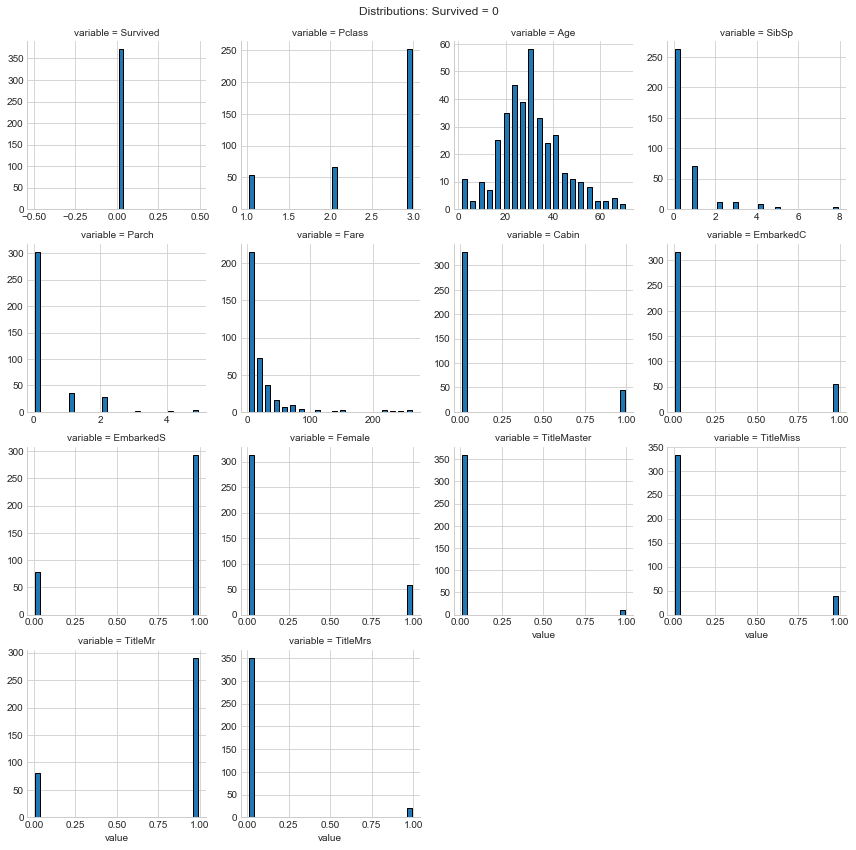

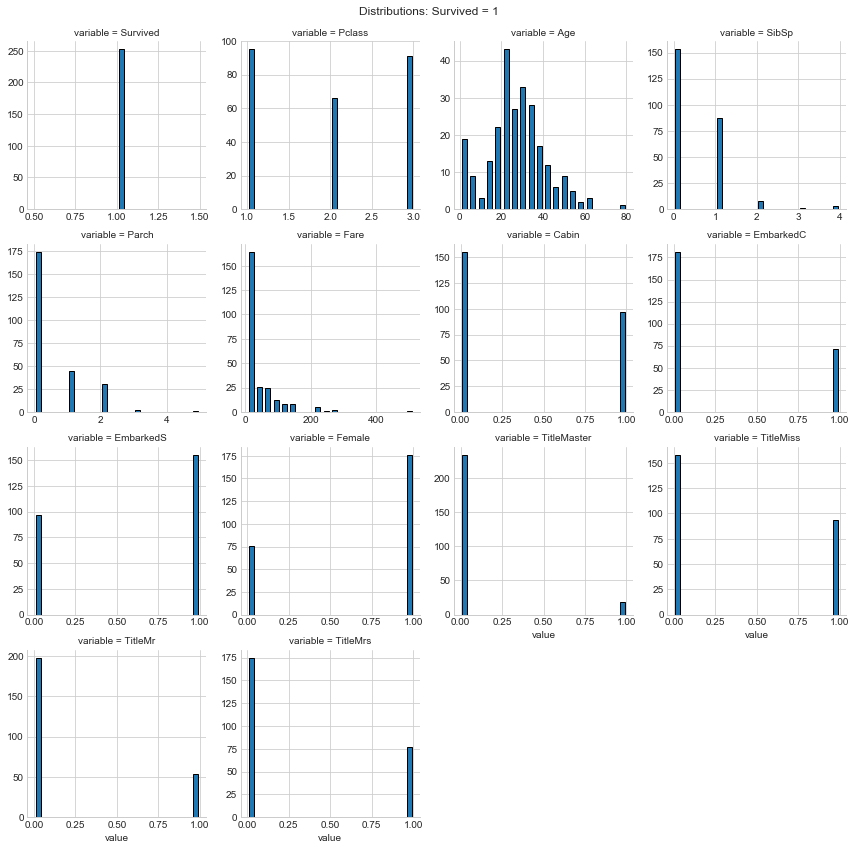

In [44]:
## --- Method 3
for x in dataC.groupby('Survived'):
    g = sns.FacetGrid(x[1].melt(), col='variable', palette='Set1', sharey=False, sharex=False, col_wrap=4)
    g = (g.map(sns.distplot, 'value', kde=False, bins=20, hist_kws={"rwidth": 0.6, 'edgecolor': 'black', 'alpha': 1.0}))
    g.fig.suptitle('Distributions: Survived = {}'.format(x[0]))
    g.fig.subplots_adjust(top=0.94)

#### Distribution Histogram (Filtered by Survived, combined)

In [45]:
## --- Method 1
# fig, ax = plt.subplots(2,2)
# dataC.groupby('Survived')['Female'].hist(alpha=0.5, normed=True, ax=ax[0,0])
# ax[0,0].set_xlabel('Female')
# dataC.groupby('Survived')['Age'].hist(alpha=0.5, normed=True, ax=ax[0,1])
# ax[0,1].set_xlabel('Age')
# dataC.groupby('Survived')['Pclass'].hist(alpha=0.5, normed=True, ax=ax[1,0])
# ax[1,0].set_xlabel('Pclass')
# dataC.groupby('Survived')['EmbarkedC'].hist(alpha=0.5, normed=True, ax=ax[1,1])
# ax[1,1].set_xlabel('EmbarkedC')
# plt.tight_layout()


In [46]:
## --- Method 2
# ut.histColumns(dataC.drop(columns='EmbarkedQ'), groupby='Survived')


D:\SoftwareWork\PythonProjects\Miniconda\envs\datascience1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


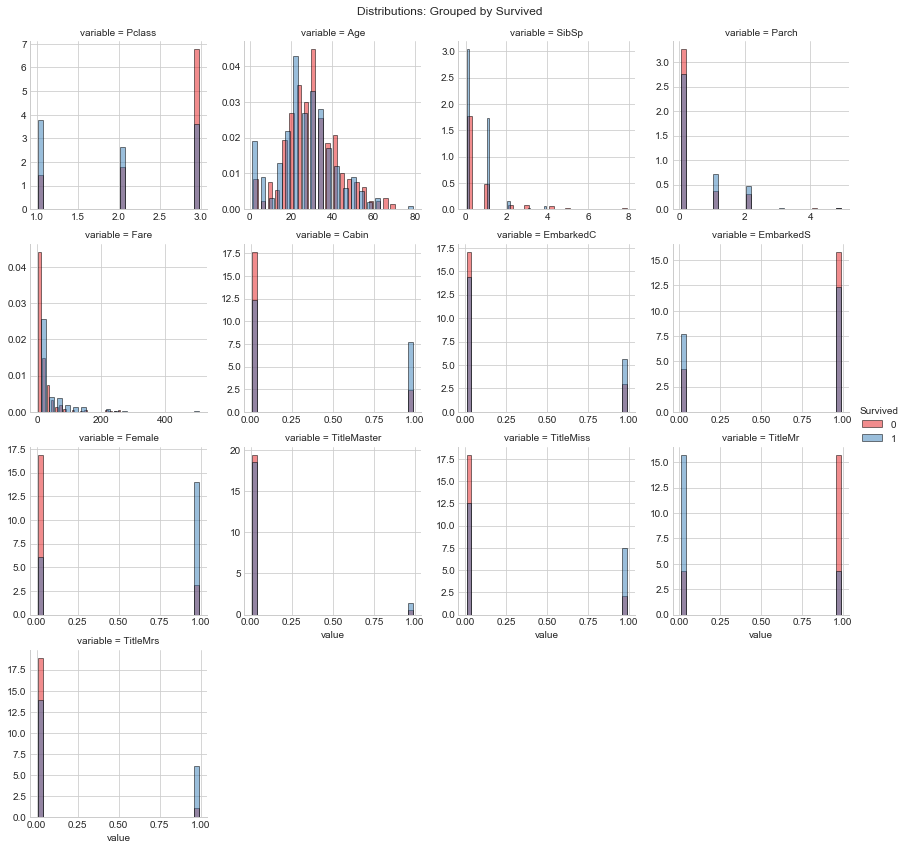

In [47]:
## --- Method 3
g = sns.FacetGrid(dataC.melt(['Survived']), col='variable', hue='Survived',
                  palette='Set1', sharey=False, sharex=False, col_wrap=4)
g = (g.map(sns.distplot, 'value', kde=False, bins=20, norm_hist=True, hist_kws={'rwidth': 0.6, 'edgecolor': 'black', 
                                                                                'alpha': 0.5}).add_legend())
g.fig.suptitle('Distributions: Grouped by Survived')
g.fig.subplots_adjust(top=0.94)

#### Linear regression by individual features
- This plot gives similar information as the correlation matrix above - just in a more 'visual' way.

In [48]:
# --- Method 1
# from pandas.plotting import scatter_matrix
# scatter_matrix(dataC[['Survived','Age','Pclass','Embarked_C']], alpha=0.3)

In [49]:
## --- Method 2
# sns.pairplot(dataC, vars=['Survived','Female','Age','Pclass','Fare','EmbarkedC'], kind="reg", 
#              markers="+", plot_kws={'scatter_kws': {'alpha': 0.5}}, diag_kws={'alpha': 1})

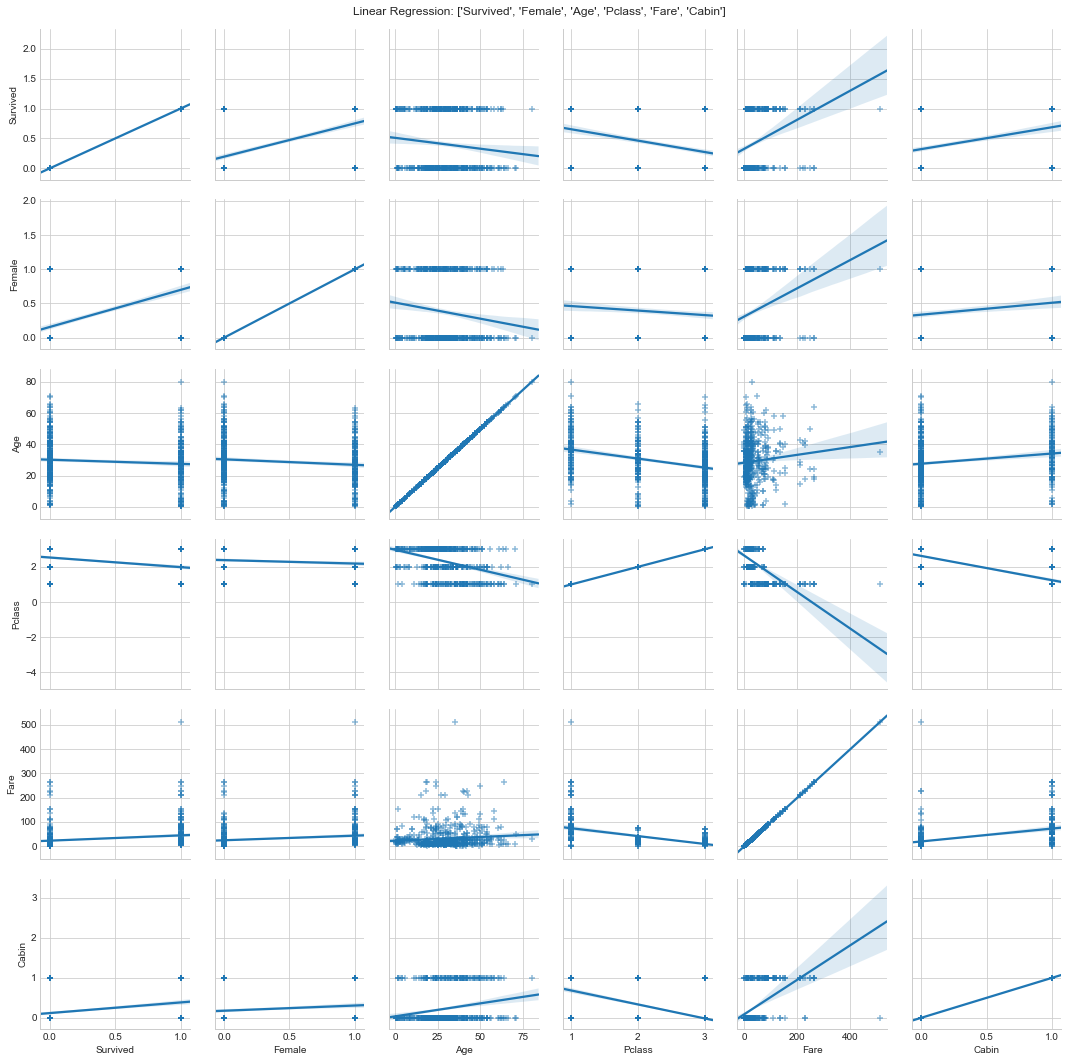

In [51]:
## --- Method 3
v = ['Survived','Female','Age','Pclass','Fare','Cabin']
g = sns.PairGrid(dataC, vars=v)
g = g.map(sns.regplot, logistic=False, marker="+", scatter_kws= {'alpha': 0.5})
g.fig.suptitle('Linear Regression: {}'.format(v))
g.fig.subplots_adjust(top=0.96)


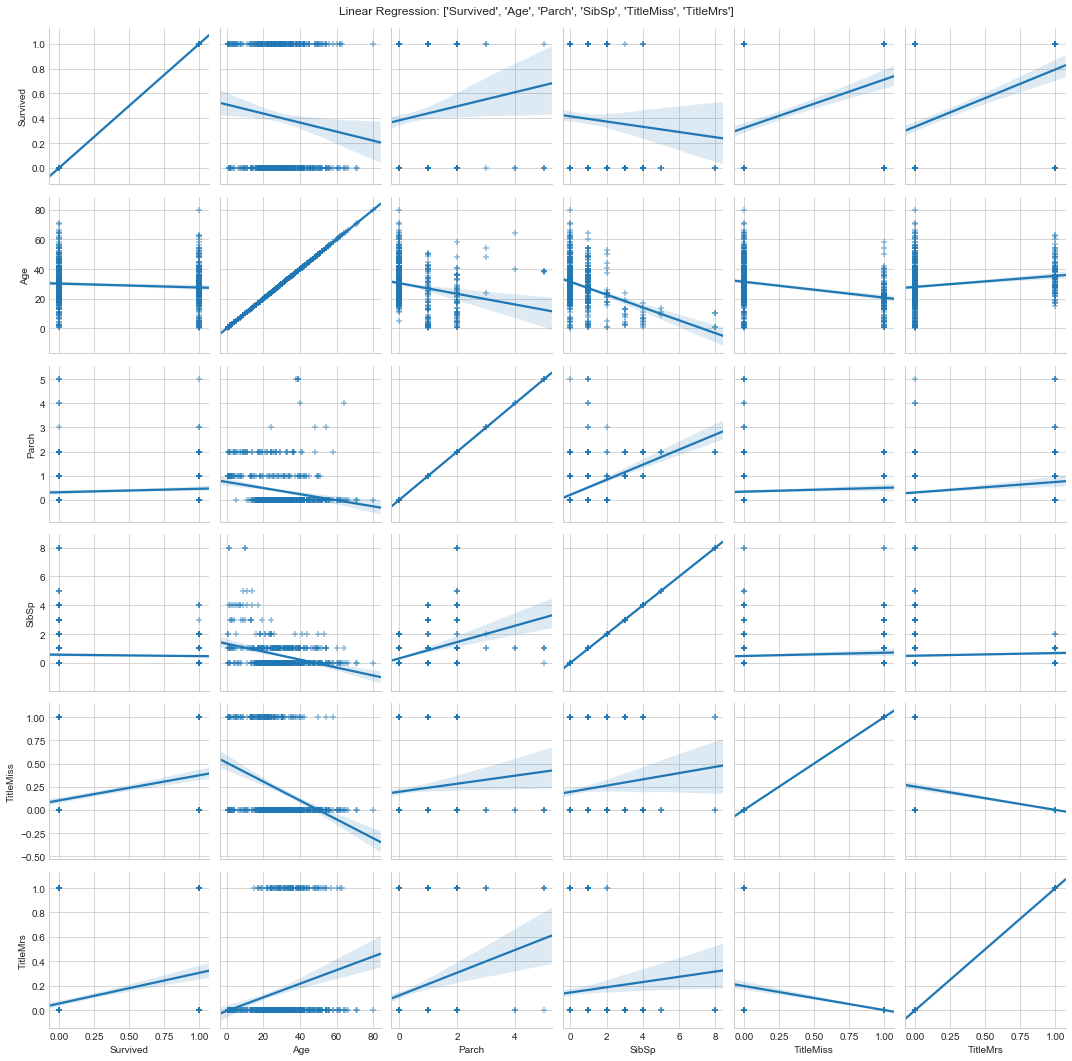

In [52]:
v = ['Survived','Age','Parch','SibSp','TitleMiss', 'TitleMrs']
g = sns.PairGrid(dataC, vars=v)
g = g.map(sns.regplot, logistic=False, marker="+", scatter_kws= {'alpha': 0.5})
plt.tight_layout()
g.fig.suptitle('Linear Regression: {}'.format(v))
g.fig.subplots_adjust(top=0.96)

#### Linear regression (filtered by Female)
- $\rho(\mathrm{Survived}, \mathrm{Age})=-0.1$; however, Age plays different role for males and females.
- This different is most pronounced for females with a large family aboard: in this case older age means higher chances to survive.

KeyError: 'Female'

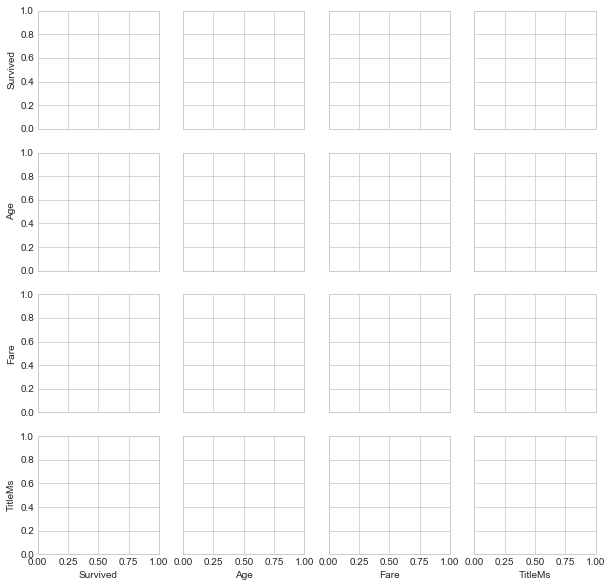

In [37]:
v = ['Survived', 'Age', 'Fare', 'TitleMiss']
g = sns.PairGrid(dataC, vars=v, hue='Female')
g = g.map(sns.regplot, lowess=False, marker="+").add_legend()
g.fig.suptitle('Linear Regression with {}, filtered by Female'.format(v))
g.fig.subplots_adjust(top=0.95)

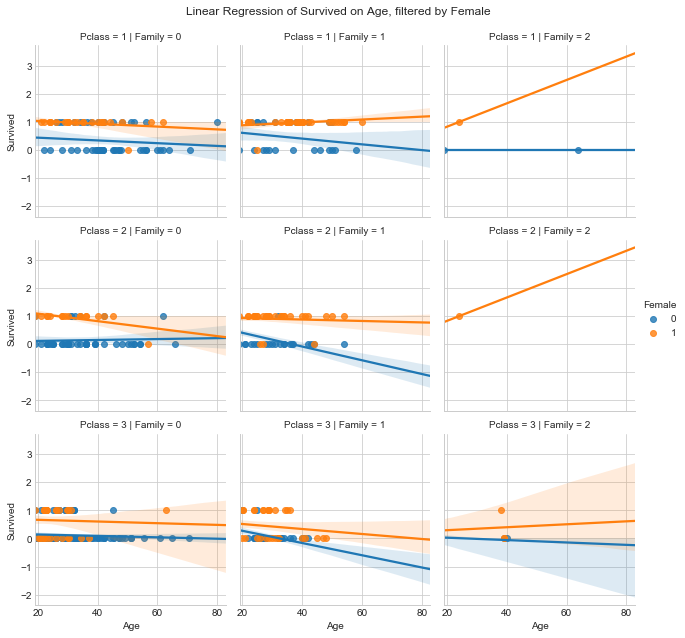

In [79]:
colFamily = dataC.Parch + dataC.SibSp
dataC['Family'] = 1
dataC.loc[colFamily>4, 'Family'] = 2
dataC.loc[colFamily==0, 'Family'] = 0
g = sns.FacetGrid(dataC, row='Pclass', col='Family', hue='Female')
g = (g.map(sns.regplot, 'Age', 'Survived', logistic=False)).add_legend()
g.fig.suptitle('Linear Regression of Survived on Age, filtered by Female')
g.fig.subplots_adjust(top=0.92)
utdata.dropFeature(dataC, 'Family')

#### Linear regression (filtered by Age)

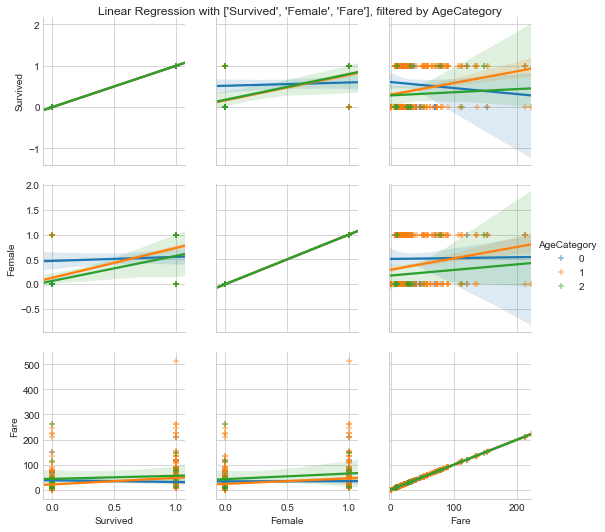

In [82]:
v = ['Survived', 'Female', 'Fare']
dataC['AgeCategory'] = 1
dataC.loc[dataC.Age<16, 'AgeCategory'] = 0
dataC.loc[dataC.Age>55, 'AgeCategory'] = 2
g = sns.PairGrid(dataC, vars=v, hue='AgeCategory')
g = (g.map(sns.regplot, logistic=False, marker="+", scatter_kws= {'alpha': 0.5}).add_legend())
g.fig.suptitle('Linear Regression with {}, filtered by AgeCategory'.format(v))
g.fig.subplots_adjust(top=0.96)
utdata.dropFeature(dataC, 'AgeCategory')

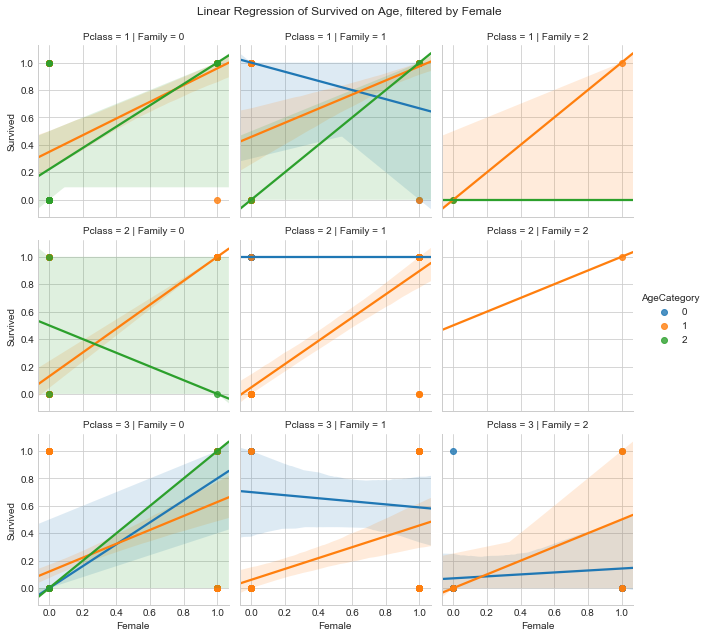

In [84]:
colFamily = dataC.Parch + dataC.SibSp
dataC['AgeCategory'] = 1
dataC.loc[dataC.Age<16, 'AgeCategory'] = 0
dataC.loc[dataC.Age>55, 'AgeCategory'] = 2
dataC['Family'] = 1
dataC.loc[colFamily>4, 'Family'] = 2
dataC.loc[colFamily==0, 'Family'] = 0
g = sns.FacetGrid(dataC, row='Pclass', col='Family', hue='AgeCategory')
g = (g.map(sns.regplot, 'Female', 'Survived', logistic=False)).add_legend()
g.fig.suptitle('Linear Regression of Survived on Age, filtered by Female')
g.fig.subplots_adjust(top=0.92)
utdata.dropFeature(dataC, 'Family')
utdata.dropFeature(dataC, 'AgeCategory')

#### Local regression by individual features
- The plots shows whether the data relations are non-linear.
- Survived - Pclass and Survived - Fare relations have an interesting dip in the middle.
- Very young passengers have much higher chanses to survive.

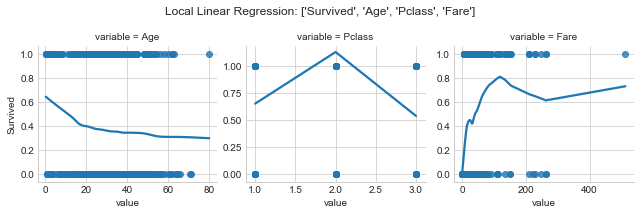

In [95]:
v = ['Survived', 'Age', 'Pclass', 'Fare']
g = sns.FacetGrid(dataC[v].melt(['Survived']), col='variable',
                  palette='Set1', sharey=False, sharex=False, col_wrap=3)
g = (g.map(sns.regplot, 'value', 'Survived', lowess=True))
g.fig.suptitle('Local Linear Regression: {}'.format(v))
g.fig.subplots_adjust(top=0.8)

### Data clipping

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,EmbarkedC,EmbarkedS,Female,TitleMaster,TitleMiss,TitleMr,TitleMrs
count,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00
mean,0.40,2.31,29.13,0.53,0.37,31.79,0.23,0.20,0.72,0.38,0.05,0.21,0.55,0.16
std,0.49,0.83,13.24,1.06,0.79,46.40,0.42,0.40,0.45,0.48,0.21,0.41,0.50,0.36
min,0.00,1.00,0.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,2.00,21.00,0.00,0.00,7.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,3.00,28.65,0.00,0.00,14.45,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
75%,1.00,3.00,36.00,1.00,0.00,30.70,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00
max,1.00,3.00,80.00,8.00,5.00,512.33,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,EmbarkedC,EmbarkedS,Female,TitleMaster,TitleMiss,TitleMr,TitleMrs
count,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00
mean,0.40,2.31,29.11,0.42,0.36,29.38,0.23,0.20,0.72,0.38,0.05,0.21,0.55,0.16
std,0.49,0.83,13.16,0.64,0.71,34.51,0.42,0.40,0.45,0.48,0.21,0.41,0.50,0.36
min,0.00,1.00,0.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,2.00,21.00,0.00,0.00,7.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,3.00,28.65,0.00,0.00,14.45,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
75%,1.00,3.00,36.00,1.00,0.00,30.70,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00
max,1.00,3.00,68.39,2.00,3.00,153.65,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,EmbarkedC,EmbarkedS,Female,TitleMaster,TitleMiss,TitleMr,TitleMrs
PassengerId,,,,,,,,,,,,,,
417,1,2,34.00,1,1,32.50,0,0,1,1,0,0,0,1
430,1,3,32.00,0,0,8.05,1,0,1,0,0,0,1,0
278,0,2,35.96,0,0,0.00,0,0,1,0,0,0,1,0
196,1,1,58.00,0,0,146.52,1,1,0,1,0,1,0,0
867,1,2,27.00,1,0,13.86,0,1,0,1,0,1,0,0


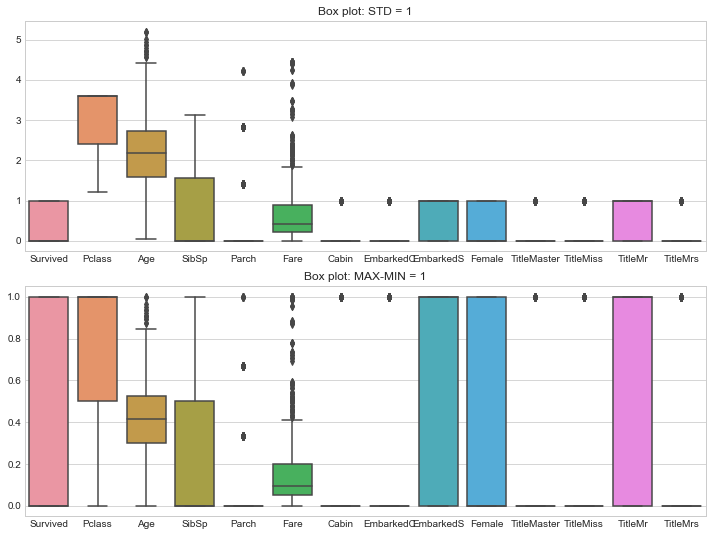

In [96]:
with utgen.printOptions():
    dataF = dataC.copy()
    display(dataF.describe())
    dataF.loc[dataF['SibSp'] > 2, 'SibSp'] = 2
    dataF.loc[dataF['Parch'] > 3, 'Parch'] = 3
    utdata.clipFeature(dataF, 'Age', nStd=3)
    utdata.clipFeature(dataF, 'Fare', nStd=3)
    display(dataF.describe())
    display(dataF.sample(5))
    fig, ax = plt.subplots(2, 1, figsize=(10,8))
    sns.boxplot(data=utdata.normFeatures(dataF, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']), ax=ax[0])
    sns.boxplot(data=utdata.normFeatures(dataF, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], 'maxmin'), ax=ax[1])
    ax[0].set_title('Box plot: STD = 1')
    ax[1].set_title('Box plot: MAX-MIN = 1')
    fig.tight_layout()
    fig.subplots_adjust(top=0.9)